mlcourse.ai

# DATA ANANLYSIS USING PANDAS
Each row is ann instance ,ie, an example of a client. The cloumns are the different features in the data set on which our output depends.

In [2]:
 from google.colab import files
 uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


Importing dataset from our local disk

In [0]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['telecom_churn.csv']))

In [4]:
df.shape

(3333, 21)

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

With the help of the info() function we can output some general inforamtion about the dataset.
Here we can see that no column has any null value as all the column have 3333 vlaues in them. In case any column would have values less than 3333 then we would have to do something of the missing value.

Since our output varibale is of boolean type we can convert it into integer 1,0

In [7]:
df['churn'] = df['churn'].astype('int64')
df.head()

state  account length  ...  customer service calls churn
0    KS             128  ...                       1     0
1    OH             107  ...                       1     0
2    NJ             137  ...                       0     0
3    OH              84  ...                       2     0
4    OK              75  ...                       3     0

[5 rows x 21 columns]

In [8]:
df.describe()

account length    area code  ...  customer service calls        churn
count     3333.000000  3333.000000  ...             3333.000000  3333.000000
mean       101.064806   437.182418  ...                1.562856     0.144914
std         39.822106    42.371290  ...                1.315491     0.352067
min          1.000000   408.000000  ...                0.000000     0.000000
25%         74.000000   408.000000  ...                1.000000     0.000000
50%        101.000000   415.000000  ...                1.000000     0.000000
75%        127.000000   510.000000  ...                2.000000     0.000000
max        243.000000   510.000000  ...                9.000000     1.000000

[8 rows x 17 columns]

The describe method gives us some mathematical stats about our dataset staritng from the nuumber of non null values, mean,etc.
from here we can the ranges of value for each column by looking into the max and min of the value. and accoriding see if we want to normalize the columns.

but describe gives us the information of columns with only numerical values. for stats about non numnerical values we have to explicitly call the following function

In [9]:
df.describe(include=['object','bool'])

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     354-6960                 no              no
freq     106            1               3010            2411

To count the number of people who left and who stayed ie were output is 0 and 1.
This gives us an idea about the distribution of data in the given data frame

In [10]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

The output shows that 2850 will not leave and 483 will.

If we want the answer in percentage we can use normalize attribute of the value_counts() function

In [11]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

#SORTING
We can sort our data according to the value of any one feature.

In [12]:
df.sort_values(by='total day charge',ascending=False).head()

state  account length  ...  customer service calls churn
365     CO             154  ...                       1     1
985     NY              64  ...                       1     1
2594    OH             115  ...                       1     1
156     OH              83  ...                       0     1
605     MO             112  ...                       2     1

[5 rows x 21 columns]

We can also use multiple columns to sort our dataset

In [13]:
df.sort_values(by=['churn','total day charge'],ascending=[True,False]).head()

state  account length  ...  customer service calls churn
688     MN              13  ...                       3     0
2259    NC             210  ...                       3     0
534     LA              67  ...                       4     0
575     SD             114  ...                       1     0
2858    AL             141  ...                       1     0

[5 rows x 21 columns]

In [14]:
df['churn'].mean()

0.14491449144914492

We can also find the mean values for differnet features for those rows with a boolean value. for eg we can find the mean of values of different features ifor all the cases where the customer left ie churn = true

In [15]:
df[df['churn']==1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

In [16]:
df[df['churn']==0].mean()

account length            100.793684
area code                 437.074737
number vmail messages       8.604561
total day minutes         175.175754
total day calls           100.283158
total day charge           29.780421
total eve minutes         199.043298
total eve calls           100.038596
total eve charge           16.918909
total night minutes       200.133193
total night calls         100.058246
total night charge          9.006074
total intl minutes         10.158877
total intl calls            4.532982
total intl charge           2.743404
customer service calls      1.449825
churn                       0.000000
dtype: float64

we can also find the mean for a particular feature

In [17]:
df[df['churn']==1]['total day charge'].mean()

35.17592132505176

we can also use many combinations for finding the mean or other statistical value

In [18]:
df[(df['churn'] == 0) & (df['international plan'] == 'No')]['total intl minutes'].max()

nan

the first arg tells the number of rows we want and the second arg tells us the number of columns

In [19]:
print(df.iloc[0:5 ,0:3])

  state  account length  area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415


Applying function to cells, col, row

In [20]:
import numpy as np
df.apply(np.max)

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes            395
total night calls              175
total night charge           17.77
total intl minutes              20
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

displays the deatils of those customers whose state starts with W

In [21]:
df[df['state'].apply(lambda state: state[0]=='W')].head()

state  account length  ...  customer service calls churn
9     WV             141  ...                       0     0
26    WY              57  ...                       0     0
44    WI              64  ...                       1     0
49    WY              97  ...                       1     0
54    WY              87  ...                       5     1

[5 rows x 21 columns]

#map()
Replacing exixting vlaue with a new value using map()

In [22]:
d = {'no':False,'yes':True}
df['international plan'] = df['international plan'].map(d)
df.head()

state  account length  ...  customer service calls churn
0    KS             128  ...                       1     0
1    OH             107  ...                       1     0
2    NJ             137  ...                       0     0
3    OH              84  ...                       2     0
4    OK              75  ...                       3     0

[5 rows x 21 columns]

# replace()
the same thing can be done with the help of replace()0 function also

In [23]:
print(df.replace({'voice mail plan':d}))

     state  account length  ...  customer service calls churn
0       KS             128  ...                       1     0
1       OH             107  ...                       1     0
2       NJ             137  ...                       0     0
3       OH              84  ...                       2     0
4       OK              75  ...                       3     0
...    ...             ...  ...                     ...   ...
3328    AZ             192  ...                       2     0
3329    WV              68  ...                       3     0
3330    RI              28  ...                       2     0
3331    CT             184  ...                       2     0
3332    TN              74  ...                       0     0

[3333 rows x 21 columns]


#summary table
Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the crosstab method:

In [24]:
pd.crosstab(df['churn'],df['international plan'])

international plan  False  True 
churn                           
0                    2664    186
1                     346    137

In [25]:
pd.crosstab(df['churn'],df['voice mail plan'],normalize=True)

voice mail plan        no       yes
churn                              
0                0.602460  0.252625
1                0.120912  0.024002

#pivot table
the pivot table has the following parameters:

values – a list of variables to calculate statistics for,

index – a list of variables to group data by,

aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

In [26]:
df.pivot_table(values=['total day calls','total eve calls','total night calls'], index=['area code'], aggfunc='mean')

total day calls  total eve calls  total night calls
area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

adding a new column 

In [27]:
df['total charges'] = df['total day charge']+df['total eve charge'] + df['total night charge'] +df['total intl charge']
df.head()

state  account length  ...  churn total charges
0    KS             128  ...      0         75.56
1    OH             107  ...      0         59.24
2    NJ             137  ...      0         62.29
3    OH              84  ...      0         66.80
4    OK              75  ...      0         52.09

[5 rows x 22 columns]

deleting a column

keep axis =1

In [0]:
df.drop(['total charges'],axis =1,inplace=True)

deleting rows

axis =0


In [29]:
df.drop([1,2],axis =0)

state  account length  ...  customer service calls churn
0       KS             128  ...                       1     0
3       OH              84  ...                       2     0
4       OK              75  ...                       3     0
5       AL             118  ...                       0     0
6       MA             121  ...                       3     0
...    ...             ...  ...                     ...   ...
3328    AZ             192  ...                       2     0
3329    WV              68  ...                       3     0
3330    RI              28  ...                       2     0
3331    CT             184  ...                       2     0
3332    TN              74  ...                       0     0

[3331 rows x 21 columns]

# GRAPHICAL REPRESENTATION OF OUR DATA


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
pd.crosstab(df['churn'],df['international plan'], margins=True)

international plan  False  True   All
churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

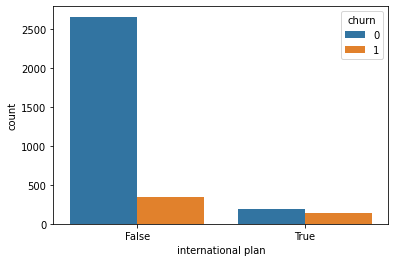

In [32]:
sns.countplot(x='international plan',hue='churn',data=df)

In [33]:
sns.countplot(x='international plan', y='churn',data=df)

TypeError: ignored

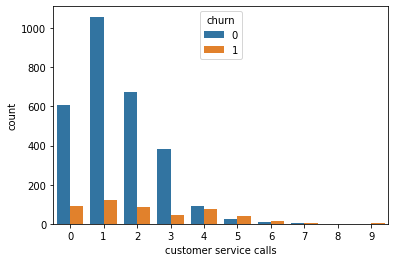

In [34]:
sns.countplot(x = 'customer service calls', hue='churn',data=df)

In [0]:
df['many services'] = (df['customer service calls']>3).astype(int)

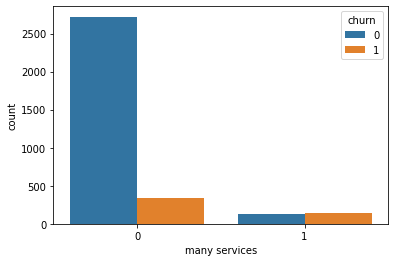

In [36]:
sns.countplot(x='many services',hue ='churn',data=df)

# TOPIC 2

**PART 1** : VISUAL DATA ANALYSIS USING 

## UNIVARIATE VISUALIZATION
In thsi we look at one feature at a time and analyze it indeoendently. We are interested in the distribution of its values and ignore all the other features in the dataset

1. histograms

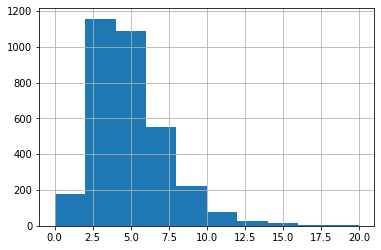

In [37]:
df['total intl calls'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee8e77240>,
      dtype=object)

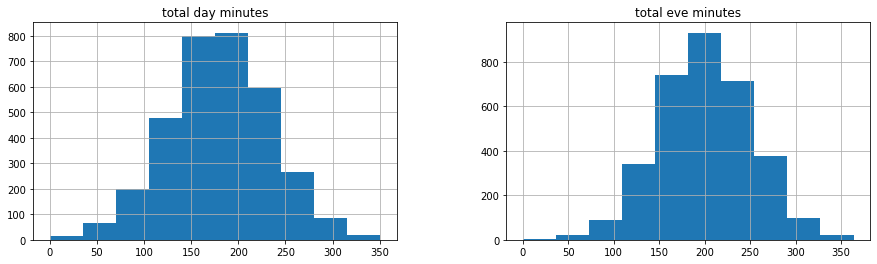

In [38]:
features = ['total day minutes', 'total eve minutes']
df[features].hist(figsize=(15,4))

2. density plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee8ec0be0>,
      dtype=object)

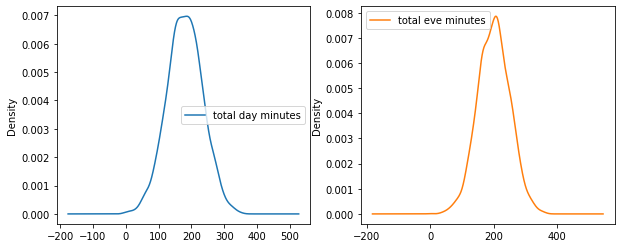

In [39]:
df[features].plot(kind='density',subplots=True, layout=(1,2),sharex=False, figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee8c65940>,
      dtype=object)

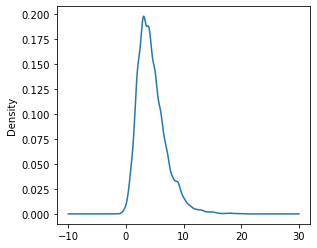

In [40]:
  df['total intl calls'].plot(kind='density',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))

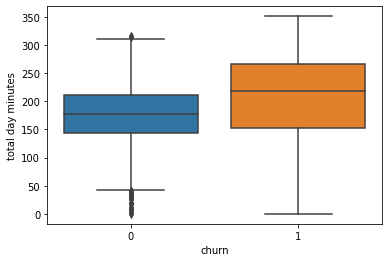

In [0]:
sns.boxplot(x='churn',y='total day minutes',data = df)

IndexError: ignored

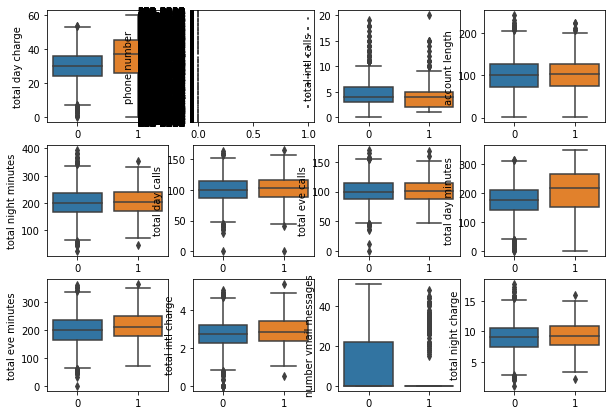

In [59]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

# MULTIVARIATE VISUALIZATION
Multi variate plots allows us to find the relat ionship between 2 or more variables in one figure

1. Correlation matrix
This matrix helps us find which numerical variables are related to each other. This is particularly important as many algorithmms like linear and logistic regeression do not handle highly correlated variables very well and leads to overfitting.

We use the corr() function to find the correlation and use heatmap from seaborn library.

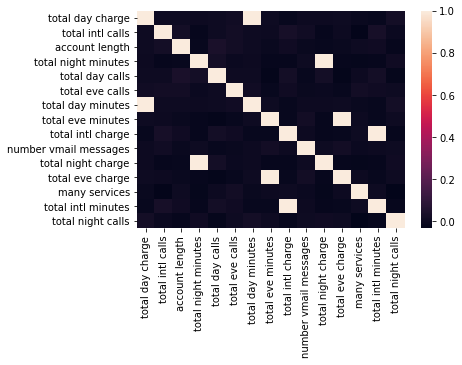

In [41]:
numerical = list(set(df.columns)-set(['state','international plan','voice mail plan','area code', 'churn','customer service calls' ]) )
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

There is a scale for the correlation coeefficient. The lighter color show high correlation betweeen the 2 variables and the darker shades imply that the variables are not related to each other at all.

we can se few white sqaures that clearly indicate that those valuesa are absolutely dependent on each other with a value of the correlatiion coefficient as 1. So we will get rid of one of them.

In [0]:
new_features = list(set(df.columns)-set(['total intl charges','total day charges','total eve charges','total night charges']))

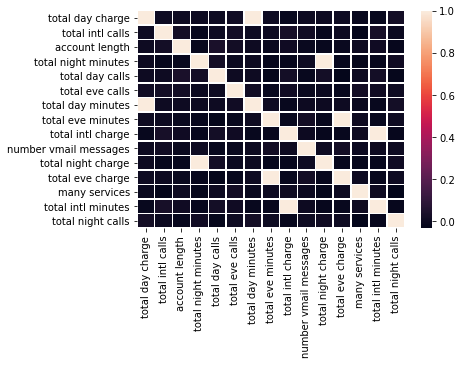

In [48]:
sns.heatmap(corr_matrix,linewidth=0.5)

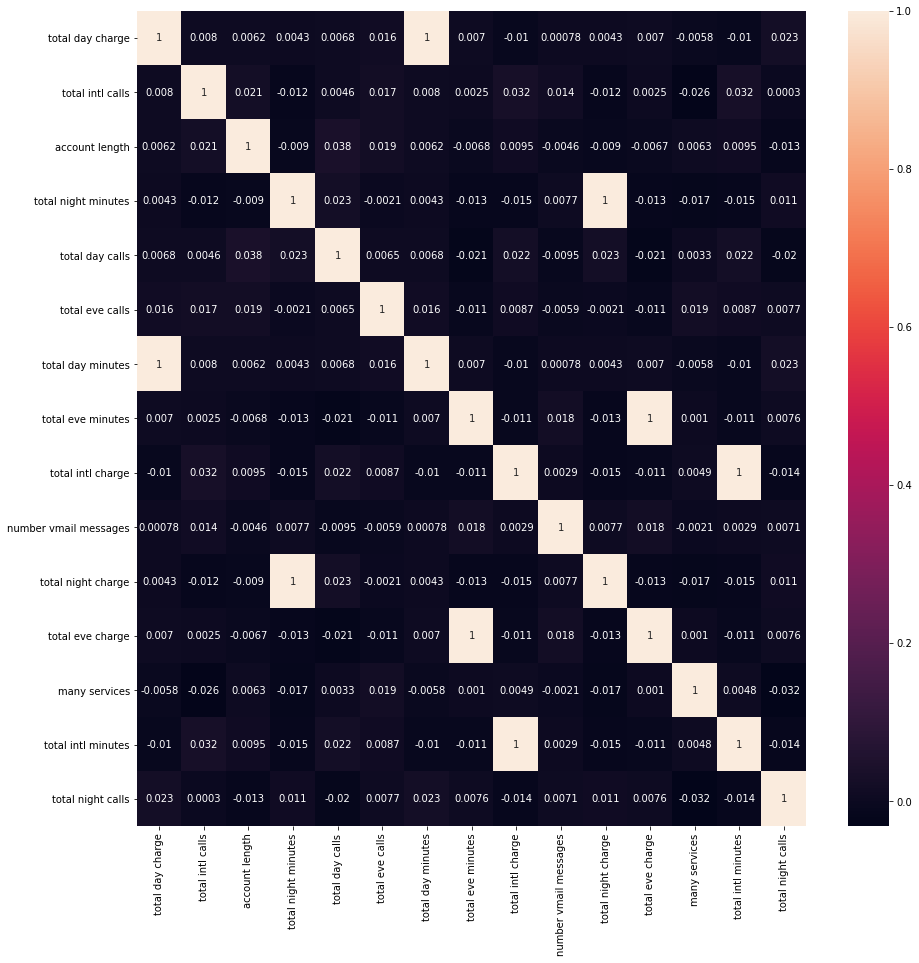

In [54]:
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)

2. Scatter plot
Scatter plot displays the values of 2 numerical variables in a 2D space.

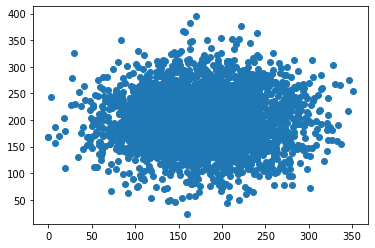

In [46]:
plt.scatter(df['total day minutes'],df['total night minutes'])

Scatter plot matrix

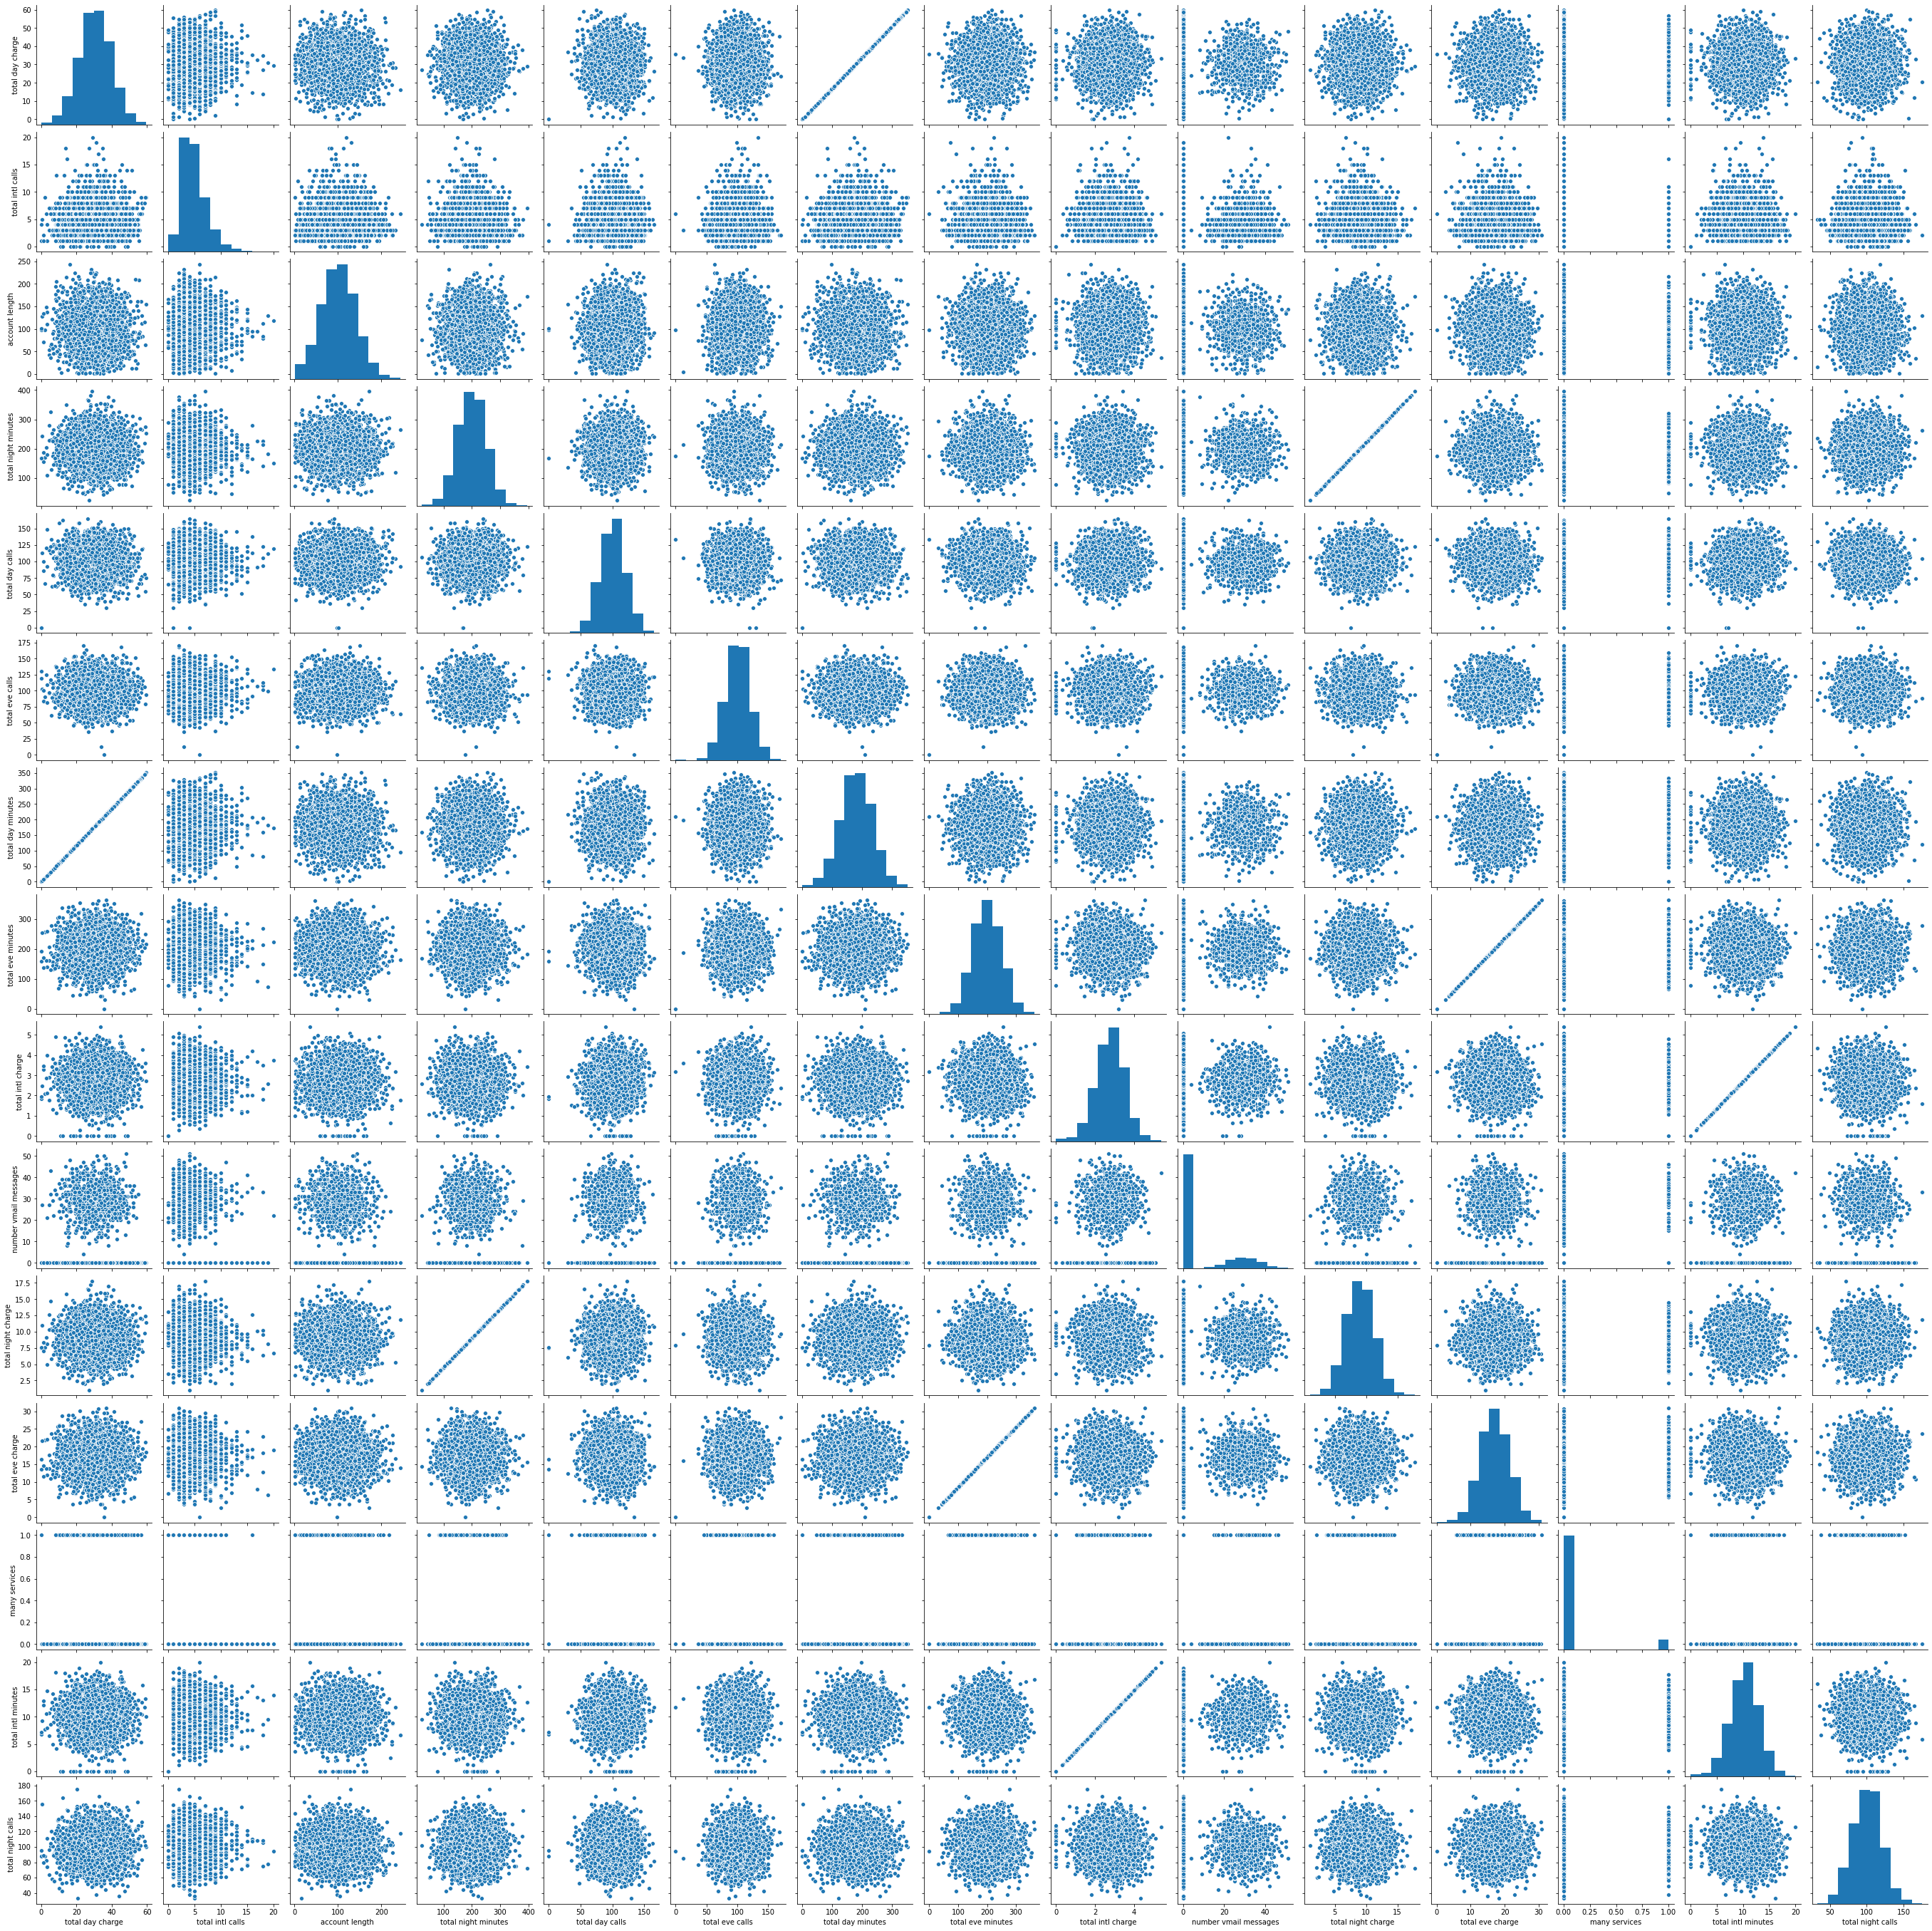

In [56]:
sns.pairplot(df[numerical])

3. contingency table/ cross tabulation

In [62]:
pd.crosstab(df['state'],df['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  ...  TN  TX  UT  VA  VT  WA  WI  WV  WY
churn                                      ...                                    
0      49  72  44  60  25  57  62  49  52  ...  48  54  62  72  65  52  71  96  68
1       3   8  11   4   9   9  12   5   9  ...   5  18  10   5   8  14   7  10   9

[2 rows x 51 columns]

In [63]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean',ascending=False).T

state        NJ        CA    TX        MD  ...        VA      AZ        AK        HI
mean   0.264706  0.264706  0.25  0.242857  ...  0.064935  0.0625  0.057692  0.056604

[1 rows x 51 columns]

the state with the maximum churns are new jersey and california